In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
iammustafatz_diabetes_prediction_dataset_path = kagglehub.dataset_download('iammustafatz/diabetes-prediction-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


## Importing the dataset

In [3]:
data = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Analysis of dataset

In [4]:
## First check null entries
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [5]:
## Now, check for duplicate rows
data.drop_duplicates(inplace=True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
data['gender'].value_counts()

,count
gender,
Female,56161
Male,39967
Other,18


In [7]:
## Do Label Encoding for gender column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


## Now, do analysis for smoking_history

In [8]:
data['smoking_history'].value_counts()

,count
smoking_history,
never,34398
No Info,32887
former,9299
current,9197
not current,6367
ever,3998


In [9]:
# Convert smoking history to numerical format
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
data['smoking_history'] = data['smoking_history'].map(smoking_history_mapping)

In [10]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,0.029143,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,0.993422,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,-1.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


## Do analysis for age column

because, above cell shows min value for age is 0.08, that is not possible

<Axes: >

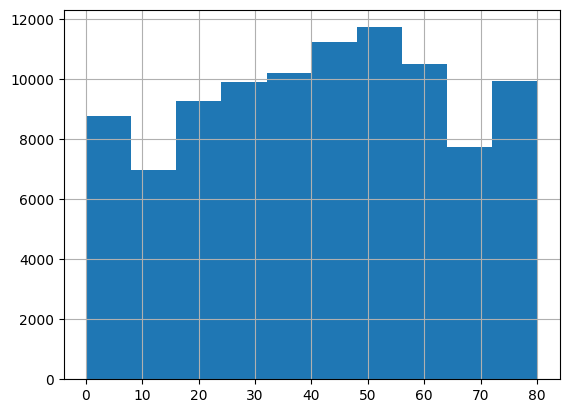

In [11]:
data['age'].hist()

## Task: Remove all records where age is given in decimal

In [12]:
data = data[data['age'].mod(1) == 0]
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [13]:
## convert age column datatype to int
data['age'] = data['age'].astype(int)
data.head()

/tmp/ipython-input-408614411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype(int)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,-1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94133 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94133 non-null  int64  
 1   age                  94133 non-null  int64  
 2   hypertension         94133 non-null  int64  
 3   heart_disease        94133 non-null  int64  
 4   smoking_history      94133 non-null  int64  
 5   bmi                  94133 non-null  float64
 6   HbA1c_level          94133 non-null  float64
 7   blood_glucose_level  94133 non-null  int64  
 8   diabetes             94133 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 MB


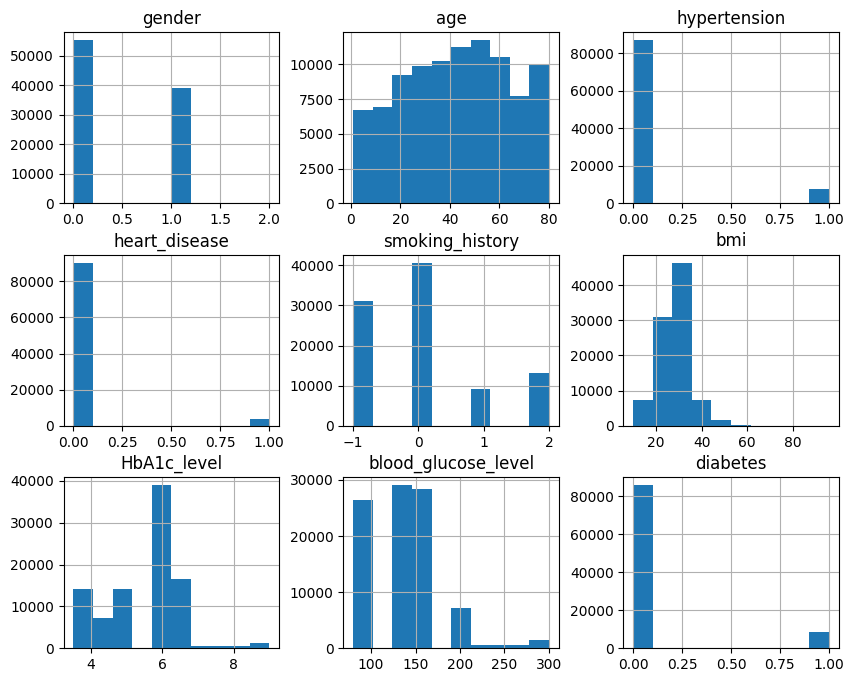

In [15]:
data.hist(bins=10, figsize=(10,8))
plt.show()

## Analysis for diabetes column

In [16]:
data['diabetes'].value_counts()

,count
diabetes,
0,85651
1,8482


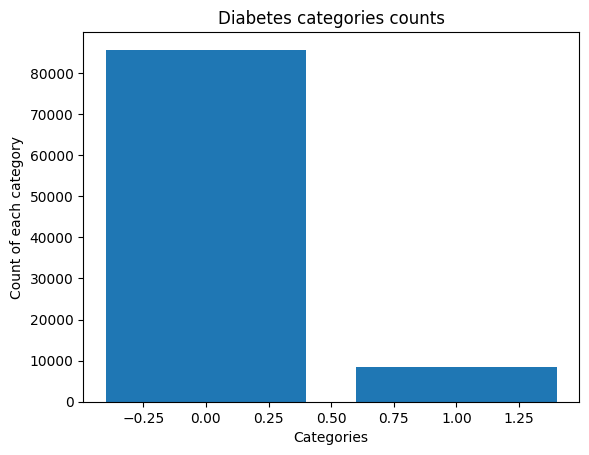

Count_of_0%: 90.9893448631192
Count_of_1%: 9.010655136880796


In [17]:
value_counts = data['diabetes'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count of each category')
plt.title('Diabetes categories counts')
plt.show()
print('Count_of_0%: {}'.format(100 *(len(data[data['diabetes'] == 0])/len(data))))
print('Count_of_1%: {}'.format(100 *(len(data[data['diabetes'] == 1])/len(data))))

### Spliting the dataset into training and testing

In [18]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Now, we will do feature scaling

In [20]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

## Training the model using LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred_lr = lr.predict(X_test)

In [23]:
print(accuracy_score(y_test, y_pred_lr))
print('True Negative', confusion_matrix(y_test, y_pred_lr).ravel()[0])
print('False Positive', confusion_matrix(y_test, y_pred_lr).ravel()[1])
print('False Negative', confusion_matrix(y_test, y_pred_lr).ravel()[2])
print('True Positive', confusion_matrix(y_test, y_pred_lr).ravel()[3])
print('F1 Score', f1_score(y_test, y_pred_lr))

0.9586763690444574
True Negative 16931
False Positive 146
False Negative 632
True Positive 1118
F1 Score 0.7418712674187127


## Training the model using KNeighborsClassifier

In [24]:
#Final code
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(1, 32, 2)),  # 1 to 31, odd numbers
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

# Initialize KNN
knn = KNeighborsClassifier()

# GridSearch with 5-fold CV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best CV Score: 0.9596977672994514


In [25]:
#Best Parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
#Best CV Score: 0.9596977672994514
best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

print(accuracy_score(y_test, y_pred_knn))
print('True Negative', confusion_matrix(y_test, y_pred_knn).ravel()[0])
print('False Positive', confusion_matrix(y_test, y_pred_knn).ravel()[1])
print('False Negative', confusion_matrix(y_test, y_pred_knn).ravel()[2])
print('True Positive', confusion_matrix(y_test, y_pred_knn).ravel()[3])
print('F1 Score', f1_score(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn))

0.9610134381473416
True Negative 17050
False Positive 27
False Negative 707
True Positive 1043
F1 Score 0.7397163120567376
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17077
           1       0.97      0.60      0.74      1750

    accuracy                           0.96     18827
   macro avg       0.97      0.80      0.86     18827
weighted avg       0.96      0.96      0.96     18827



In [28]:
#Final Recall
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(1, 32, 2)),  # 1 to 31, odd numbers
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

# Initialize KNN
knn = KNeighborsClassifier()

# GridSearch with 5-fold CV, optimizing recall
grid_recall = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_recall.fit(X_train, y_train)

# Best parameters for recall
print("Best Parameters (Recall):", grid_recall.best_params_)
print("Best CV Recall Score:", grid_recall.best_score_)

Best Parameters (Recall): {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best CV Recall Score: 0.6737976969347986


In [29]:
#Best Parameters (Recall): {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
#Best CV Recall Score: 0.6737976969347986
best_knn_recall = grid_recall.best_estimator_
y_pred_knn_recall = best_knn_recall.predict(X_test)


In [30]:
print(accuracy_score(y_test, y_pred_knn_recall))
print('True Negative', confusion_matrix(y_test,  y_pred_knn_recall).ravel()[0])
print('False Positive', confusion_matrix(y_test,  y_pred_knn_recall).ravel()[1])
print('False Negative', confusion_matrix(y_test,  y_pred_knn_recall).ravel()[2])
print('True Positive', confusion_matrix(y_test,  y_pred_knn_recall).ravel()[3])
print('F1 Score', f1_score(y_test,  y_pred_knn_recall))

print(classification_report(y_test,  y_pred_knn_recall))

0.9466723322887343
True Negative 16633
False Positive 444
False Negative 560
True Positive 1190
F1 Score 0.7033096926713948
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17077
           1       0.73      0.68      0.70      1750

    accuracy                           0.95     18827
   macro avg       0.85      0.83      0.84     18827
weighted avg       0.95      0.95      0.95     18827



## Training the model using LinearSVM

In [31]:
%%time
from sklearn.svm import SVC
linear_kernel = SVC(kernel = 'linear')
linear_kernel.fit(X_train, y_train)

CPU times: user 39.9 s, sys: 222 ms, total: 40.1 s
Wall time: 41.1 s


SVC(kernel='linear')

In [32]:
y_pred_svm = linear_kernel.predict(X_test)

In [33]:
print(accuracy_score(y_test, y_pred_svm))
print('True Negative', confusion_matrix(y_test, y_pred_svm).ravel()[0])
print('False Positive', confusion_matrix(y_test, y_pred_svm).ravel()[1])
print('False Negative', confusion_matrix(y_test, y_pred_svm).ravel()[2])
print('True Positive', confusion_matrix(y_test, y_pred_svm).ravel()[3])
print('F1 Score', f1_score(y_test, y_pred_svm))

0.95857013863069
True Negative 17009
False Positive 68
False Negative 712
True Positive 1038
F1 Score 0.726890756302521


In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# --- THEORY: Expected values ---
n_patients = 5
accuracy = 0.95      # from your test set result
recall = 0.68        # from your test set result
specificity = 0.97   # from your test set result

print("=== Expected Performance (Theory) ===")
print("Mixed sample (Accuracy):", n_patients * accuracy, "≈ 4–5 correct")
print("All positives (Recall):", n_patients * recall, "≈ 3–4 detected")
print("All negatives (Specificity):", n_patients * specificity, "≈ 5 correct")



=== Expected Performance (Theory) ===
Mixed sample (Accuracy): 4.75 ≈ 4–5 correct
All positives (Recall): 3.4000000000000004 ≈ 3–4 detected
All negatives (Specificity): 4.85 ≈ 5 correct


In [37]:
# --- ACTUAL: Test model on 5 patients ---
# Randomly pick 5 patients from test set
idx = np.random.choice(len(X_test), size=5, replace=False)
X_small = X_test[idx]
y_small = y_test[idx]

# Predict with trained KNN
y_pred_small = best_knn_recall.predict(X_small)

print("\n=== Actual Performance (Sample of 5 Patients) ===")
print("Indices:", idx)
print("True labels:     ", y_small.tolist())
print("Predicted labels:", y_pred_small.tolist())

# Evaluate on this small sample
cm = confusion_matrix(y_small, y_pred_small)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_small, y_pred_small, digits=3))


=== Actual Performance (Sample of 5 Patients) ===
Indices: [ 1732  8009 11387  6724 13782]
True labels:      [0, 0, 0, 0, 0]
Predicted labels: [0, 1, 0, 0, 0]

Confusion Matrix:
 [[4 1]
 [0 0]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.800     0.889         5
           1      0.000     0.000     0.000         0

    accuracy                          0.800         5
   macro avg      0.500     0.400     0.444         5
weighted avg      1.000     0.800     0.889         5



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
